In [1]:
protein = "MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH"
from disassembly.simulate_proteolysis import (
    simulate_proteolysis,
    enzyme_set,
    enzyme,
)
from disassembly.util import amino_acids

n_generate = 250

k_enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
    ],
    [1],
    [1],
)

kr_enzymes = enzyme_set(
    [
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
    ],
    [1],
    [1],
)

viat_enzymes = enzyme_set(
    [
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [1],
    [1],
)

krviat_enzymes = enzyme_set(
    [
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [1, 1],
    [1, 1],
)

random_enzymes = enzyme_set(
    [enzyme({aa: 1 / len(amino_acids) for aa in amino_acids.values()}, "random")],
    [1],
    [1],
)

In [2]:
generated_peptidomes = {"name": [], "peptidome": []}

names = ["k", "kr", "krviat", "viat", "random"]


for enz, name in zip(
    [k_enzymes, kr_enzymes, krviat_enzymes, viat_enzymes, random_enzymes], names
):
    for i in range(10):
        generated_peptidome = simulate_proteolysis(
            protein,
            n_start=1,
            n_generate=n_generate,
            endo_or_exo_probability=[0.9, 0.1],
            enzymes=enz,
            graph=False,
            verbose=False,
        )
        generated_peptidomes["name"].append(f"{name}_{i}")
        generated_peptidomes["peptidome"].append(generated_peptidome)

In [3]:
from disassembly.util import KL, normalize_dict
from disassembly.estimate_parameters import compare

comparisons = {}
for i in range(len(generated_peptidomes["peptidome"])):
    name_comp_1 = generated_peptidomes["name"][i]
    peptidome_comp_1 = generated_peptidomes["peptidome"][i]
    comparisons[name_comp_1] = {}
    for j in range(len(generated_peptidomes["peptidome"])):
        name_comp_2 = generated_peptidomes["name"][j]
        peptidome_comp_2 = generated_peptidomes["peptidome"][j]
        p, q = compare(peptidome_comp_1, peptidome_comp_2)
        err = KL(p, q) + KL(q, p)
        comparisons[name_comp_1][name_comp_2] = err

import pandas as pd

comps_df = pd.DataFrame(comparisons)

/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


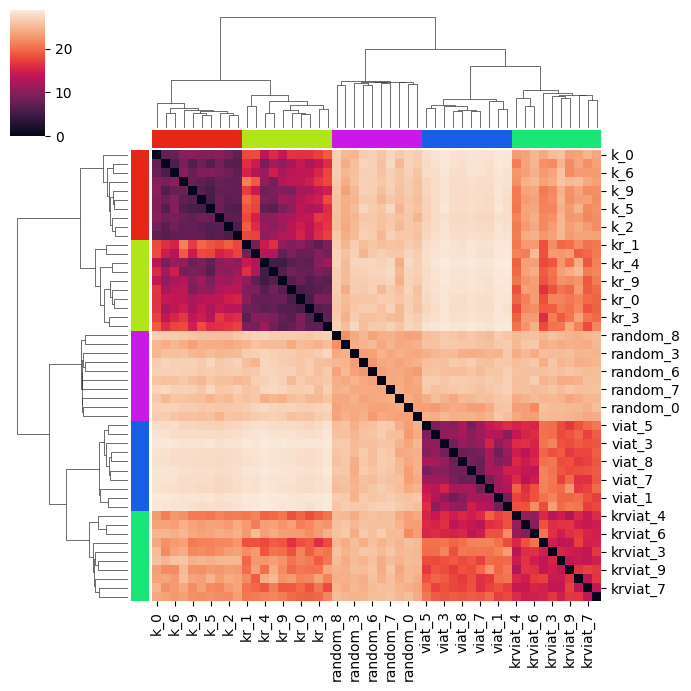

In [4]:
import seaborn as sns

lut = dict(zip(names, sns.hls_palette(len(names), l=0.5, s=0.8)))

lst = []
for i, n in enumerate(names):
    lst += [f"{n}"] * 10

row_colors = pd.DataFrame(lst)[0].map(lut)


sns.clustermap(
    comps_df,
    figsize=(7, 7),
    row_colors=row_colors.to_numpy(),
    col_colors=row_colors.to_numpy(),
)

In [5]:
from disassembly.simulate_proteolysis import simulate_proteolysis, enzyme_set, enzyme


# Say we want to estimate parameters for K enzyme.
enzymes = enzyme_set(
    [
        enzyme({"K": 1}, "protease_iv"),
        enzyme({"K": 0.5, "R": 0.5}, "trypsin"),
        enzyme({"V": 0.5, "I": 0.25, "A": 0.15, "T": 0.1}, "elne"),
    ],
    [1, 0, 0],  # activities
    [1, 0, 0],  # abundances
)


true_dict, sequence_graph = simulate_proteolysis(
    protein,
    n_start=1,
    n_generate=n_generate,
    endo_or_exo_probability=[0.9, 0.1],
    enzymes=enzymes,
    graph=True,
)

 249 / 250 (258)
93 unique peptides. 251 total


Iteration: 0
	V: 27.55 | 26.57
	I: 26.45 | 26.57
I better!
	I: 25.90 | 26.45
I better!
	I: 25.86 | 25.90
I better!
	I: 26.47 | 25.86
	L: 28.00 | 25.86
	E: 27.61 | 25.86
	Q: 26.50 | 25.86
	D: 28.16 | 25.86
	N: 27.39 | 25.86
	H: 28.06 | 25.86
	W: 27.73 | 25.86
	F: 27.97 | 25.86
	Y: 27.18 | 25.86
	R: 28.69 | 25.86
	K: 16.37 | 25.86
K better!
	K: 13.41 | 16.37
K better!
	K: 9.77 | 13.41
K better!
	K: 10.23 | 9.77
	S: 20.85 | 9.77
	T: 16.53 | 9.77
	M: 15.63 | 9.77
	A: 19.47 | 9.77
	G: 22.41 | 9.77
	P: 16.51 | 9.77
	C: 15.43 | 9.77
Iteration: 1
	V: 21.42 | 11.12
	I: 10.74 | 11.12
I better!
	I: 12.22 | 10.74
	L: 22.06 | 10.74
	E: 17.21 | 10.74
	Q: 14.66 | 10.74
	D: 20.10 | 10.74
	N: 19.10 | 10.74
	H: 18.46 | 10.74
	W: 11.43 | 10.74
	F: 19.94 | 10.74
	Y: 13.63 | 10.74
	R: 18.54 | 10.74
	K: 9.87 | 10.74
K better!
	K: 10.59 | 9.87
	S: 15.91 | 9.87
	T: 16.13 | 9.87
	M: 15.93 | 9.87
	A: 18.31 | 9.87
	G: 23.46 | 9.87
	P: 21.11 | 9.87
	C: 14.01 | 9.87
Iteration: 2
	V: 21.13 | 11.98
	I: 12.22 | 11.98

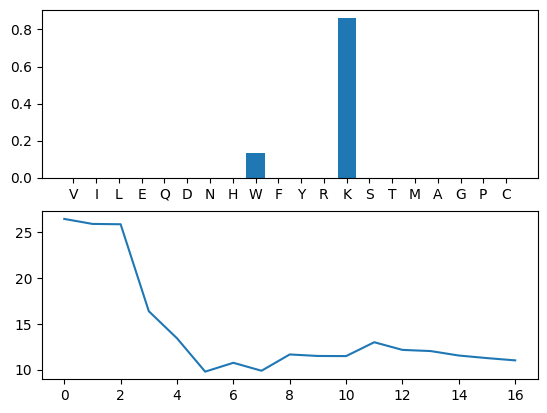

In [6]:
from disassembly.estimate_parameters import ParameterEstimator

pe = ParameterEstimator()

parameters = pe.estimate(protein, true_dict, n_generate=n_generate, n_iterations_endo=3)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1)
axs[0].bar(parameters["endo"].keys(), parameters["endo"].values())
axs[1].plot(pe.best_losses)
print(parameters["exo"])

In [7]:
from disassembly.estimate_weights_gd import WeightEstimatorGD

wegd = WeightEstimatorGD(lr=0.1, n_iterations=100, lam=0.1)

G = wegd.run(true_dict, verbose=True, parameters=parameters)
generated = wegd.generated
losses = wegd.losses
weights = wegd.weights

fig, axs = plt.subplot_mosaic(
    [["generated", "loss"], ["true", "loss"]], width_ratios=[2, 2]
)


axs["true"].bar(
    true_dict.keys(), [v / sum(true_dict.values()) for v in true_dict.values()]
)
axs["generated"].bar(
    generated[len(generated.keys()) - 1].keys(),
    generated[len(generated.keys()) - 1].values(),
    color="orange",
)
axs["loss"].plot(losses)
axs["true"].set_title("True distribution")
axs["generated"].set_title(f"Generated distribution")
axs["loss"].set_title("Loss")
axs["true"].set_xticks([])
axs["generated"].set_xticks([])
plt.show()

IndexError: string index out of range

0.7405867095966372

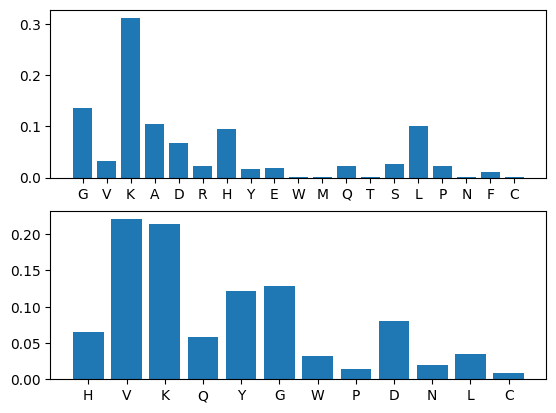

In [ ]:
from disassembly.cut_site import get_p1

p1, p1_exo, exo, endo = get_p1(G, 5000)
fig, axs = plt.subplots(2, 1)
axs[0].bar(p1.keys(), height=p1.values())
axs[1].bar(p1_exo.keys(), height=p1_exo.values())
endo / (exo + endo)

0.9211508695256305

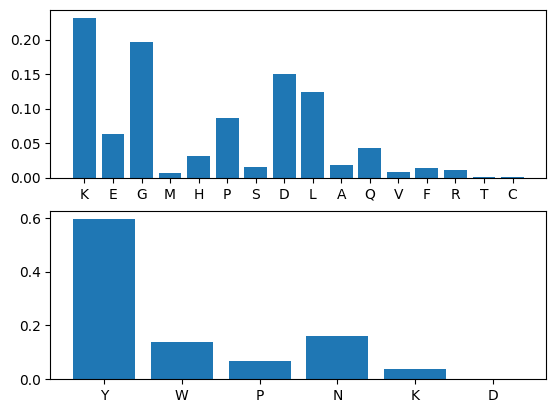

In [ ]:
p1, p1_exo, exo, endo = get_p1(sequence_graph, 5000)
fig, axs = plt.subplots(2, 1)
axs[0].bar(p1.keys(), height=p1.values())
axs[1].bar(p1_exo.keys(), height=p1_exo.values())
endo / (exo + endo)

In [ ]:
from disassembly.disassembly import get_disassembly_indexes_mc
from disassembly.disassembly import get_disassembly

print("Real")
real_disassembly_indexes = get_disassembly_indexes_mc(sequence_graph, N_particles=10000)
get_disassembly(true_dict, real_disassembly_indexes)
print("Estimated")
mc_di = get_disassembly_indexes_mc(G, 10000)
get_disassembly(true_dict, mc_di)

Real

 Averaged DI: 3.29
Estimated

 Averaged DI: 3.79


22.915382751880973

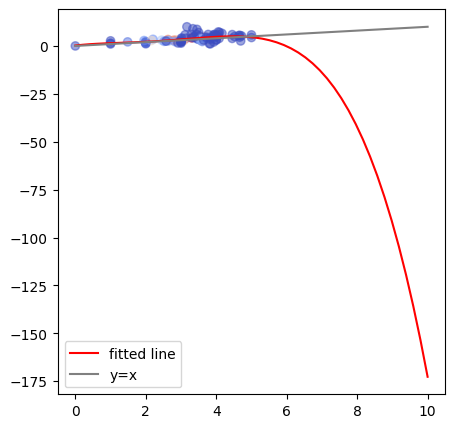

In [ ]:
from disassembly.util import plot_di_correlation

plot_di_correlation(true_dict, real_disassembly_indexes, mc_di)